In [1]:
import numpy as np
import pandas as pd
import gensim
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

C:\Users\Jane\AppData\Local\Programs\Python\Python38\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Jane\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Jane\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
# combine 2 csv files
combined_csv = pd.concat([pd.read_csv(f) for f in ['scopus_first_2000.csv','scopus_last_2000.csv'] ])
# export to csv
combined_csv.to_csv( "combined_csv.csv", index=False, encoding='utf-8-sig')

In [3]:
# drop duplicates
df = pd.read_csv("combined_csv.csv").drop_duplicates(subset=['Title', 'Abstract'])
df

,Authors,Author(s) ID,Title,Year,Source title,Volume,Issue,Art. No.,Page start,Page end,...,Affiliations,Authors with affiliations,Abstract,Author Keywords,Index Keywords,Document Type,Publication Stage,Open Access,Source,EID
0,"Tripathi A., Jain A., Mishra K.K., Pandey A.B....",57208326453;57221875424;57221865054;5722100955...,MCNN: A deep learning based rapid diagnosis me...,2020,Revue d'Intelligence Artificielle,34,6,NaN,673,682,...,"Department of IT, G. L. Bajaj Institute of Tec...","Tripathi, A., Department of IT, G. L. Bajaj In...",Due to the rapidly spreading nature of coronav...,Convolutional Neural Network (ConvNet or CNN);...,Diagnosis; Learning systems; Polymerase chain ...,Article,Final,NaN,Scopus,2-s2.0-85100515688
1,"Anichini N., Nemeth D.",57221562253;57221563464;,Localization in the time of COVID-19 Perspecti...,2020,Journal of Internationalization and Localization,7,1-2,NaN,122,129,...,"Translation Manager, MCIS Language Solutions, ...","Anichini, N., Translation Manager, MCIS Langua...",[No abstract available],NaN,NaN,Article,Final,NaN,Scopus,2-s2.0-85099479794
2,Bowker L.,6603844230;,French-language COVID-19 terminology Internati...,2020,Journal of Internationalization and Localization,7,1-2,NaN,1,27,...,"School of Translation, Interpretation Universi...","Bowker, L., School of Translation, Interpretat...",The COVID-19 pandemic situation developed very...,Canada; COVID-19; De-terminologization; Europe...,NaN,Article,Final,NaN,Scopus,2-s2.0-85099449898
3,"Kim K.Y., Song I.K.",52763405400;56082843200;,Exploring working group's psychological subjec...,2020,KSII Transactions on Internet and Information ...,14,12,NaN,4748,4762,...,"Department of Marketing Big Data, Mokwon Unive...","Kim, K.Y., Department of Marketing Big Data, M...","Recently, the COVID 19 pandemic has affected o...",Case Study; Cloud-Based Social Networking; Int...,Cloud computing; Mobile telecommunication syst...,Article,Final,NaN,Scopus,2-s2.0-85099375086
4,"Zhang H., Yang Y., Li J., Wang M., Saravanan K...",57205603988;57215379404;57190290261;5721692686...,A novel virtual screening procedure identifies...,2020,PLoS Computational Biology,16,12 December,e1008489,NaN,NaN,...,"Center for High Performance Computing, Joint E...","Zhang, H., Center for High Performance Computi...",The spread of severe acute respiratory syndrom...,NaN,adenosine; amoxicillin; azithromycin; clofarab...,Article,Final,NaN,Scopus,2-s2.0-85098975999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3910,"Nguyen H.V., Tran H.X., Van Huy L., Nguyen X.N...",57193392858;57216710070;57208281415;5720813443...,Online Book Shopping in Vietnam: The Impact of...,2020,Publishing Research Quarterly,36,3,NaN,437,445,...,"Department of Research Administration, Thuongm...","Nguyen, H.V., Department of Research Administr...",The coronavirus disease 2019 (COVID-19) pandem...,COVID-19; Hedonic motivation; Marketing effort...,NaN,Article,Final,NaN,Scopus,2-s2.0-85084363769
3911,"Tripathy A.K., Mohapatra A.G., Mohanty S.P., K...",7006845194;55786418900;7202569569;14522547800;...,EasyBand: A Wearable for Safety-Aware Mobility...,2020,IEEE Consumer Electronics Magazine,9,5,9085930,57,61,...,"School of Com Puter Science, Gangadhar Meher U...","Tripathy, A.K., School of Com Puter Science, G...",COVID-19 (Corona Virus Disease 2019) is a pand...,NaN,Viruses; Contact tracing; Safety-aware; Virus ...,Article,Final,NaN,Scopus,2-s2.0-85084212361
3912,Naudé W.,23568665700;,Artificial intelligence vs COVID-19: limitatio...,2020,AI and Society,35,3,NaN,761,765,...,"Technology, Innovation, Entrepreneurship and M...","Naudé, W., Technology, Innovation, Entrepreneu...",This paper provides an early evaluation of Art...,AI; COVID-19; Data science; Public health; Sur...,Data privacy; Early evaluation; Economic damag...,Article,Final,NaN,Scopus,2-s2.0-85083992349
3913,"Chen Q., Min C., Zhang W., Wang G., Ma X., Eva...",36655325300;57216391958;56760584900;5721662395...,Unpack

In [4]:
# drop empty abstract
df =  df.drop(df[ df['Abstract']== "[No abstract available]" ].index)
df = df.reset_index(drop=True)
df

,Authors,Author(s) ID,Title,Year,Source title,Volume,Issue,Art. No.,Page start,Page end,...,Affiliations,Authors with affiliations,Abstract,Author Keywords,Index Keywords,Document Type,Publication Stage,Open Access,Source,EID
0,"Tripathi A., Jain A., Mishra K.K., Pandey A.B....",57208326453;57221875424;57221865054;5722100955...,MCNN: A deep learning based rapid diagnosis me...,2020,Revue d'Intelligence Artificielle,34,6,NaN,673,682,...,"Department of IT, G. L. Bajaj Institute of Tec...","Tripathi, A., Department of IT, G. L. Bajaj In...",Due to the rapidly spreading nature of coronav...,Convolutional Neural Network (ConvNet or CNN);...,Diagnosis; Learning systems; Polymerase chain ...,Article,Final,NaN,Scopus,2-s2.0-85100515688
1,Bowker L.,6603844230;,French-language COVID-19 terminology Internati...,2020,Journal of Internationalization and Localization,7,1-2,NaN,1,27,...,"School of Translation, Interpretation Universi...","Bowker, L., School of Translation, Interpretat...",The COVID-19 pandemic situation developed very...,Canada; COVID-19; De-terminologization; Europe...,NaN,Article,Final,NaN,Scopus,2-s2.0-85099449898
2,"Kim K.Y., Song I.K.",52763405400;56082843200;,Exploring working group's psychological subjec...,2020,KSII Transactions on Internet and Information ...,14,12,NaN,4748,4762,...,"Department of Marketing Big Data, Mokwon Unive...","Kim, K.Y., Department of Marketing Big Data, M...","Recently, the COVID 19 pandemic has affected o...",Case Study; Cloud-Based Social Networking; Int...,Cloud computing; Mobile telecommunication syst...,Article,Final,NaN,Scopus,2-s2.0-85099375086
3,"Zhang H., Yang Y., Li J., Wang M., Saravanan K...",57205603988;57215379404;57190290261;5721692686...,A novel virtual screening procedure identifies...,2020,PLoS Computational Biology,16,12 December,e1008489,NaN,NaN,...,"Center for High Performance Computing, Joint E...","Zhang, H., Center for High Performance Computi...",The spread of severe acute respiratory syndrom...,NaN,adenosine; amoxicillin; azithromycin; clofarab...,Article,Final,NaN,Scopus,2-s2.0-85098975999
4,"Jenila V.M., Varalakshmi P., Sundar Rajasekar ...",57223043474;46661903700;57218503046;,"Geospatial mapping, Epidemiological modelling,...",2020,Proceedings of IEEE International Conference o...,NaN,NaN,9398398,NaN,NaN,...,"Anna University, Department of Computer Techno...","Jenila, V.M., Anna University, Department of C...",Coronavirus disease (COVID-19) is a pandemic t...,COVID-19; Forest cover; MODIS; Normalized diff...,Cell proliferation; Correlation methods; Demog...,Conference Paper,Final,NaN,Scopus,2-s2.0-85104683590
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3847,"Nguyen H.V., Tran H.X., Van Huy L., Nguyen X.N...",57193392858;57216710070;57208281415;5720813443...,Online Book Shopping in Vietnam: The Impact of...,2020,Publishing Research Quarterly,36,3,NaN,437,445,...,"Department of Research Administration, Thuongm...","Nguyen, H.V., Department of Research Administr...",The coronavirus disease 2019 (COVID-19) pandem...,COVID-19; Hedonic motivation; Marketing effort...,NaN,Article,Final,NaN,Scopus,2-s2.0-85084363769
3848,"Tripathy A.K., Mohapatra A.G., Mohanty S.P., K...",7006845194;55786418900;7202569569;14522547800;...,EasyBand: A Wearable for Safety-Aware Mobility...,2020,IEEE Consumer Electronics Magazine,9,5,9085930,57,61,...,"School of Com Puter Science, Gangadhar Meher U...","Tripathy, A.K., School of Com Puter Science, G...",COVID-19 (Corona Virus Disease 2019) is a pand...,NaN,Viruses; Contact tracing; Safety-aware; Virus ...,Article,Final,NaN,Scopus,2-s2.0-85084212361
3849,Naudé W.,23568665700;,Artificial intelligence vs COVID-19: limitatio...,2020,AI and Society,35,3,NaN,761,765,...,"Technology, Innovation, Entrepreneurship and M...","Naudé, W., Technology, Innovation, Entrepreneu...",This paper provides an early evaluation of Art...,AI; COVID-19; Data science; Public health; Sur...,Data privacy; Early evaluation; 

In [5]:
# write clean data to csv file
df.to_csv("cleaned_data.csv", encoding='utf-8-sig')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3852 entries, 0 to 3851
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Authors                    3852 non-null   object 
 1   Author(s) ID               3852 non-null   object 
 2   Title                      3852 non-null   object 
 3   Year                       3852 non-null   int64  
 4   Source title               3848 non-null   object 
 5   Volume                     1975 non-null   object 
 6   Issue                      1112 non-null   object 
 7   Art. No.                   2137 non-null   object 
 8   Page start                 2639 non-null   object 
 9   Page end                   2629 non-null   object 
 10  Page count                 3 non-null      float64
 11  Cited by                   1658 non-null   float64
 12  DOI                        3497 non-null   object 
 13  Link                       3852 non-null   objec

In [7]:
len(df[df['Document Type']=='Article'])

1520

In [8]:
len(df[df['Document Type']=='Conference Paper'])

2332

In [9]:
# tokenization with gensim.utils.simple_preprocess
text_set = df['Title'] + ' ' + df['Abstract']
def tokenization(text):
    return gensim.utils.simple_preprocess(str(text), deacc=True)

text_set = text_set.apply(tokenization)
print(text_set[0])

['mcnn', 'deep', 'learning', 'based', 'rapid', 'diagnosis', 'method', 'for', 'covid', 'from', 'the', 'ray', 'images', 'due', 'to', 'the', 'rapidly', 'spreading', 'nature', 'of', 'coronavirus', 'pandemic', 'situation', 'has', 'emerged', 'around', 'the', 'world', 'it', 'is', 'affecting', 'society', 'at', 'large', 'that', 'includes', 'the', 'global', 'economy', 'and', 'public', 'health', 'too', 'it', 'was', 'found', 'in', 'recent', 'studies', 'that', 'the', 'novel', 'and', 'unknown', 'nature', 'of', 'this', 'virus', 'makes', 'it', 'more', 'difficult', 'to', 'identify', 'and', 'treat', 'the', 'affected', 'patient', 'in', 'the', 'early', 'stage', 'in', 'this', 'context', 'time', 'consuming', 'method', 'named', 'reverse', 'transcription', 'polymerase', 'chain', 'reaction', 'rt', 'pcr', 'is', 'being', 'used', 'to', 'detect', 'the', 'positive', 'cases', 'of', 'covid', 'which', 'requires', 'blood', 'samples', 'of', 'the', 'suspects', 'to', 'diagnose', 'the', 'disease', 'this', 'paper', 'present

In [10]:
# remove stop words
stop_words = stopwords.words('english')
def remove_stopwords(text):
    return [word for word in text if word not in stop_words]
text_set = text_set.apply(remove_stopwords)
print(text_set[0])

['mcnn', 'deep', 'learning', 'based', 'rapid', 'diagnosis', 'method', 'covid', 'ray', 'images', 'due', 'rapidly', 'spreading', 'nature', 'coronavirus', 'pandemic', 'situation', 'emerged', 'around', 'world', 'affecting', 'society', 'large', 'includes', 'global', 'economy', 'public', 'health', 'found', 'recent', 'studies', 'novel', 'unknown', 'nature', 'virus', 'makes', 'difficult', 'identify', 'treat', 'affected', 'patient', 'early', 'stage', 'context', 'time', 'consuming', 'method', 'named', 'reverse', 'transcription', 'polymerase', 'chain', 'reaction', 'rt', 'pcr', 'used', 'detect', 'positive', 'cases', 'covid', 'requires', 'blood', 'samples', 'suspects', 'diagnose', 'disease', 'paper', 'presents', 'new', 'deep', 'learning', 'based', 'method', 'detect', 'covid', 'cases', 'using', 'chest', 'ray', 'images', 'recent', 'studies', 'show', 'radiology', 'images', 'relevant', 'features', 'used', 'predict', 'covid', 'proposed', 'method', 'developed', 'binary', 'classification', 'identify', 'pe

In [11]:
# lemmatization
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatization(text):
    return [wordnet_lemmatizer.lemmatize(word,pos="v") for word in text]
text_set = text_set.apply(lemmatization)
print(text_set[0])

['mcnn', 'deep', 'learn', 'base', 'rapid', 'diagnosis', 'method', 'covid', 'ray', 'image', 'due', 'rapidly', 'spread', 'nature', 'coronavirus', 'pandemic', 'situation', 'emerge', 'around', 'world', 'affect', 'society', 'large', 'include', 'global', 'economy', 'public', 'health', 'find', 'recent', 'study', 'novel', 'unknown', 'nature', 'virus', 'make', 'difficult', 'identify', 'treat', 'affect', 'patient', 'early', 'stage', 'context', 'time', 'consume', 'method', 'name', 'reverse', 'transcription', 'polymerase', 'chain', 'reaction', 'rt', 'pcr', 'use', 'detect', 'positive', 'case', 'covid', 'require', 'blood', 'sample', 'suspect', 'diagnose', 'disease', 'paper', 'present', 'new', 'deep', 'learn', 'base', 'method', 'detect', 'covid', 'case', 'use', 'chest', 'ray', 'image', 'recent', 'study', 'show', 'radiology', 'image', 'relevant', 'feature', 'use', 'predict', 'covid', 'propose', 'method', 'develop', 'binary', 'classification', 'identify', 'person', 'infect', 'covid', 'total', 'ray', 'i

In [12]:
# convert to bag-of-world format and remove extreme frequency words by using gensim.corpora
dictionary = gensim.corpora.Dictionary(text_set)
dictionary.filter_extremes(no_below=5, no_above=0.8)
bow_corpus = [dictionary.doc2bow(text) for text in text_set]
print(bow_corpus[0])
print(bow_corpus[1])
print(len(dictionary))

[(0, 2), (1, 2), (2, 1), (3, 1), (4, 2), (5, 1), (6, 1), (7, 1), (8, 3), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 2), (17, 2), (18, 1), (19, 2), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 2), (36, 6), (37, 2), (38, 1), (39, 1), (40, 2), (41, 1), (42, 6), (43, 1), (44, 1), (45, 2), (46, 1), (47, 2), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 3), (62, 1), (63, 1), (64, 1), (65, 1), (66, 3), (67, 1), (68, 2), (69, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1), (78, 1), (79, 1), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1), (85, 1), (86, 1), (87, 2), (88, 1), (89, 1), (90, 1), (91, 1), (92, 1), (93, 1), (94, 1), (95, 1), (96, 3), (97, 1), (98, 1), (99, 1), (100, 1)]
[(12, 1), (18, 2), (27, 1), (30, 1), (32, 1), (33, 1), (50, 2), (62, 1), (80, 4), (91, 1), (96, 1),

### LDA

In [13]:
def compute_coherence_values(dictionary, corpus, texts, topics_number):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    topics_number : List of topisc number choice

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in topics_number:
        alpha = np.full( (num_topics, ), ( 50 / num_topics ) )
        model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=num_topics, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha=alpha,
                                           eta=0.1,
                                           per_word_topics=True)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [14]:
topics_number = [2, 5, 7, 8, 9, 10, 15, 18, 20, 22, 25, 30, 35, 40]
model_list, coherence_values = compute_coherence_values(
    dictionary=dictionary, corpus=bow_corpus, texts=text_set, topics_number=topics_number)


In [15]:
# Print the coherence scores
for m, cv in zip(topics_number, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.4124
Num Topics = 5  has Coherence Value of 0.4592
Num Topics = 7  has Coherence Value of 0.5026
Num Topics = 8  has Coherence Value of 0.4978
Num Topics = 9  has Coherence Value of 0.4954
Num Topics = 10  has Coherence Value of 0.4802
Num Topics = 15  has Coherence Value of 0.4736
Num Topics = 18  has Coherence Value of 0.4767
Num Topics = 20  has Coherence Value of 0.4845
Num Topics = 22  has Coherence Value of 0.4888
Num Topics = 25  has Coherence Value of 0.484
Num Topics = 30  has Coherence Value of 0.4664
Num Topics = 35  has Coherence Value of 0.4488
Num Topics = 40  has Coherence Value of 0.4278


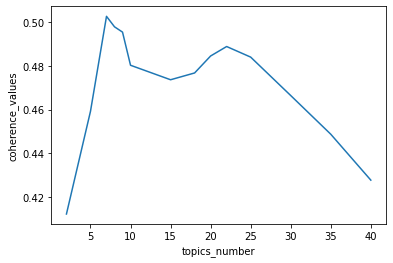

In [16]:
import matplotlib.pyplot as plt
plt.plot(topics_number,coherence_values)
plt.xlabel('topics_number')
plt.ylabel('coherence_values')
plt.show()

In [17]:
chosen_model = model_list[9]
print(chosen_model.print_topics(num_topics=22, num_words=10))

[(0, '0.099*"learn" + 0.072*"online" + 0.051*"students" + 0.039*"education" + 0.038*"teach" + 0.019*"school" + 0.019*"course" + 0.018*"teachers" + 0.018*"educational" + 0.017*"university"'), (1, '0.043*"develop" + 0.041*"one" + 0.039*"different" + 0.030*"many" + 0.026*"also" + 0.025*"well" + 0.025*"could" + 0.019*"community" + 0.019*"various" + 0.018*"world"'), (2, '0.063*"design" + 0.058*"author" + 0.023*"build" + 0.023*"use" + 0.021*"two" + 0.020*"end" + 0.020*"springer" + 0.019*"switzerland" + 0.018*"nature" + 0.015*"main"'), (3, '0.050*"present" + 0.043*"tool" + 0.036*"right" + 0.034*"new" + 0.034*"challenge" + 0.029*"science" + 0.028*"reserve" + 0.028*"current" + 0.022*"engineer" + 0.021*"paper"'), (4, '0.118*"model" + 0.046*"case" + 0.037*"number" + 0.023*"predict" + 0.017*"prediction" + 0.015*"infect" + 0.013*"rate" + 0.012*"population" + 0.012*"epidemic" + 0.012*"parameters"'), (5, '0.047*"public" + 0.045*"social" + 0.040*"relate" + 0.032*"media" + 0.030*"people" + 0.029*"analy

In [18]:
import json
topics = {}
for topic in chosen_model.print_topics(num_topics=22, num_words=10):
    if topic not in topics.keys():
        topics[int(topic[0])]={}
    temp = topic[1].split("+")
    for elem in temp:
        component = elem.split("*")
        topics[topic[0]][component[1].replace("\"",'').strip()] = float(component[0])
topics = dict(sorted(list(topics.items())))
f = open("topics_component.json",'w')
json.dump(topics,f)

In [19]:
result = chosen_model.get_document_topics(bow=bow_corpus[0])
result.sort(key=lambda x:x[1],reverse=True)
result

[(15, 0.2977568),
 (17, 0.07512665),
 (7, 0.071249135),
 (3, 0.05921496),
 (4, 0.049911533),
 (10, 0.044015814),
 (9, 0.03967998),
 (1, 0.03961859),
 (20, 0.03595833),
 (2, 0.027362512),
 (11, 0.02677003),
 (8, 0.025567688),
 (18, 0.025516568),
 (5, 0.02297529),
 (16, 0.022495328),
 (6, 0.021992601),
 (19, 0.021644961),
 (14, 0.019596277),
 (13, 0.018928291),
 (12, 0.018502843),
 (21, 0.018104916),
 (0, 0.01801088)]

In [20]:
def get_document_topics(bow_corpus, raw_df):
    result_df = pd.DataFrame()
    topics_res = pd.DataFrame()
    for bow in bow_corpus:
        topics_list =  chosen_model.get_document_topics(bow=bow)
        topics_list.sort(key=lambda x:x[1],reverse=True)

        res_arr = np.zeros(22)
        res_arr[topics_list[0][0]] = 1
        res_arr[topics_list[1][0]] = 1
        topics_res = topics_res.append(pd.Series(res_arr), ignore_index=True)

        row = [int(topics_list[0][0]), round(topics_list[0][1]*100,2), int(topics_list[1][0]), round(topics_list[1][1]*100,2)]
        result_df = result_df.append(pd.Series(row), ignore_index=True)
    result_df.columns = ['1st_topic', '1st_topic_percentage', '2nd_topic', '2nd_topic_percentage']
    titles = pd.Series(raw_df['Title'])
    result_df = pd.concat([titles,result_df],axis=1)

    vectorize_co_matrix = topics_res.T.dot(topics_res)
    print(topics_res.shape,topics_res.T.shape,vectorize_co_matrix.shape)
    return result_df,vectorize_co_matrix

In [21]:
result_df,vectorize_co_matrix = get_document_topics(bow_corpus,df)
result_df.head(10)
result_df.to_csv('topic_modelling_res.csv')

(3852, 22) (22, 3852) (22, 22)


In [22]:
norm_vec_co_matrix = vectorize_co_matrix / (3852 * 2)
vectorize_co_matrix

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,764.0,30.0,35.0,93.0,4.0,14.0,83.0,13.0,19.0,14.0,...,8.0,0.0,20.0,5.0,131.0,68.0,23.0,56.0,16.0,14.0
1,30.0,215.0,2.0,5.0,19.0,9.0,8.0,7.0,7.0,4.0,...,8.0,19.0,7.0,38.0,6.0,4.0,15.0,2.0,13.0,2.0
2,35.0,2.0,224.0,12.0,20.0,4.0,8.0,1.0,8.0,5.0,...,11.0,54.0,3.0,7.0,16.0,4.0,11.0,3.0,8.0,6.0
3,93.0,5.0,12.0,240.0,6.0,2.0,17.0,6.0,0.0,4.0,...,5.0,14.0,11.0,11.0,5.0,2.0,24.0,6.0,8.0,0.0
4,4.0,19.0,20.0,6.0,563.0,22.0,6.0,127.0,8.0,32.0,...,12.0,28.0,4.0,70.0,4.0,43.0,13.0,5.0,18.0,43.0
5,14.0,9.0,4.0,2.0,22.0,286.0,58.0,23.0,5.0,24.0,...,6.0,6.0,4.0,24.0,10.0,5.0,15.0,11.0,6.0,5.0
6,83.0,8.0,8.0,17.0,6.0,58.0,377.0,5.0,4.0,6.0,...,8.0,2.0,17.0,3.0,42.0,2.0,37.0,16.0,15.0,10.0
7,13.0,7.0,1.0,6.0,127.0,23.0,5.0,414.0,13.0,3.0,...,34.0,35.0,5.0,52.0,7.0,6.0,18.0,4.0,15.0,12.0
8,19.0,7.0,8.0,0.0,8.0,5.0,4.0,13.0,273.0,8.0,...,66.0,3.0,12.0,64.0,10.0,9.0,7.0,1.0,13.0,8.0
9,14.0,4.0,5.0,4.0,32.0,24.0,6.0,3.0,8.0,274.0,...,5.0,33.0,8.0,65.0,2.0,5.0,8.0,13.0,4.0,4.0


In [23]:
vectorize_co_matrix[7][4]

127.0

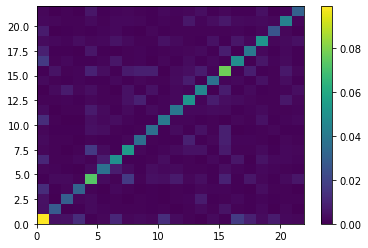

In [24]:
from matplotlib import cm
from matplotlib.colors import ListedColormap

viridis = cm.get_cmap('viridis', 256)
newcolors = viridis(np.linspace(0, 1, 256))
newcmp = ListedColormap(newcolors)
fig, axs = plt.subplots(1)
psm = axs.pcolormesh(norm_vec_co_matrix,cmap=newcmp)
fig.colorbar(psm,ax=axs)
plt.show()

### Topics Network

In [25]:
import networkx as nx

G = nx.Graph()
G.add_nodes_from(np.arange(0,22))

for i in range(22):
    for j in range(0,i):
        G.add_edge(i,j,weight=vectorize_co_matrix[i][j])
G.edges(data=True)


EdgeDataView([(0, 1, {'weight': 30.0}), (0, 2, {'weight': 35.0}), (0, 3, {'weight': 93.0}), (0, 4, {'weight': 4.0}), (0, 5, {'weight': 14.0}), (0, 6, {'weight': 83.0}), (0, 7, {'weight': 13.0}), (0, 8, {'weight': 19.0}), (0, 9, {'weight': 14.0}), (0, 10, {'weight': 97.0}), (0, 11, {'weight': 21.0}), (0, 12, {'weight': 8.0}), (0, 13, {'weight': 0.0}), (0, 14, {'weight': 20.0}), (0, 15, {'weight': 5.0}), (0, 16, {'weight': 131.0}), (0, 17, {'weight': 68.0}), (0, 18, {'weight': 23.0}), (0, 19, {'weight': 56.0}), (0, 20, {'weight': 16.0}), (0, 21, {'weight': 14.0}), (1, 2, {'weight': 2.0}), (1, 3, {'weight': 5.0}), (1, 4, {'weight': 19.0}), (1, 5, {'weight': 9.0}), (1, 6, {'weight': 8.0}), (1, 7, {'weight': 7.0}), (1, 8, {'weight': 7.0}), (1, 9, {'weight': 4.0}), (1, 10, {'weight': 8.0}), (1, 11, {'weight': 2.0}), (1, 12, {'weight': 8.0}), (1, 13, {'weight': 19.0}), (1, 14, {'weight': 7.0}), (1, 15, {'weight': 38.0}), (1, 16, {'weight': 6.0}), (1, 17, {'weight': 4.0}), (1, 18, {'weight': 1

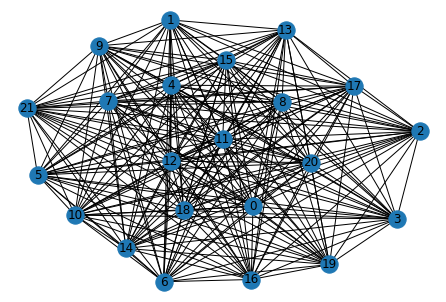

In [26]:
pos = nx.spring_layout(G)  # positions for all nodes

nx.draw(G,pos)
# labels = nx.get_edge_attributes(G,'weight')
# nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
nx.draw_networkx_labels(G, pos)

plt.axis("off")
plt.show()

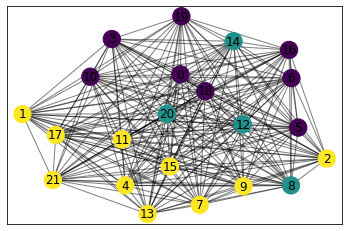

In [27]:
# clustering 
import community as community_louvain

#first compute the best partition
partition = community_louvain.best_partition(G)

# draw the graph
pos = nx.spring_layout(G)
# color the nodes according to their partition
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(G, pos, partition.keys(), cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw_networkx_labels(G, pos)
plt.show()

In [28]:
nx.set_node_attributes(G, partition, "cluster")
nx.write_gexf(G, "co_topics_nextwork.gexf")

In [29]:
# weighted degree
def weighted_degree(G):
    res = np.zeros(22)
    for edge in G.edges(data=True):
        res[edge[0]] += edge[2]['weight']
        res[edge[1]] += edge[2]['weight']
    return res
weighted_degree_G = weighted_degree(G)
weighted_degree_G

array([764., 215., 224., 240., 563., 286., 377., 414., 273., 274., 308.,
       299., 394., 352., 280., 595., 373., 306., 394., 200., 338., 235.])

In [30]:
def draw_bar_graph(val,topic):
    words = [x for x in val.keys()]
    portion = [x for x in val.values()]

    plt.barh(words,portion)
    plt.title("Topic "+str(topic))
    plt.ylabel('Word')
    plt.xlabel('Significence')
    title = "t"+str(topic)+".png"
    plt.savefig(title,bbox_inches="tight")
    plt.show()

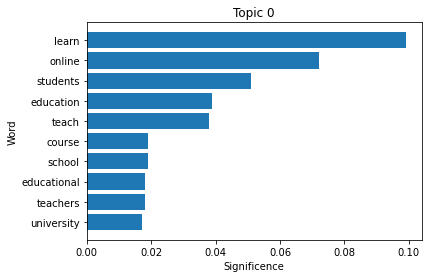

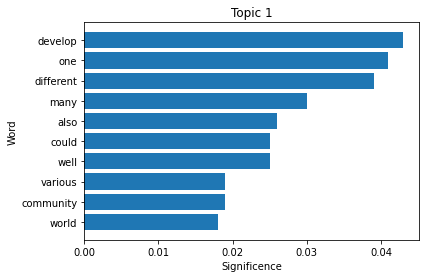

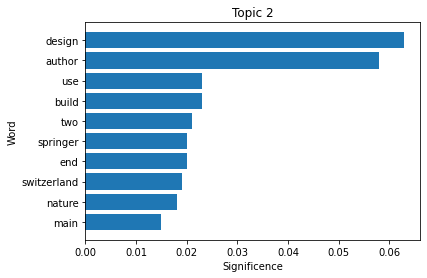

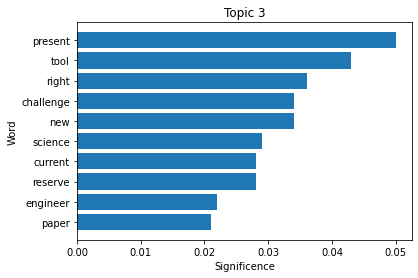

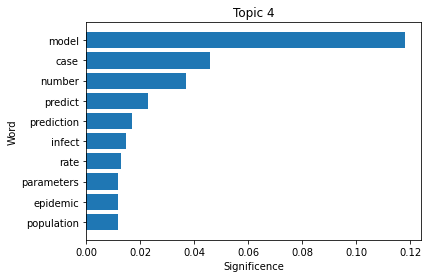

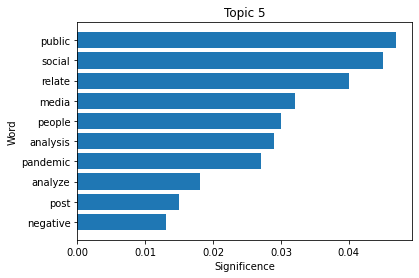

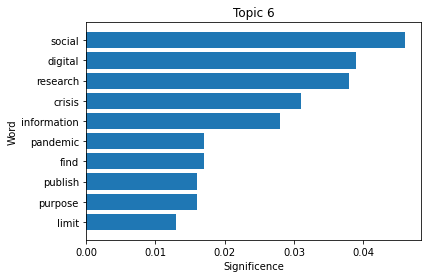

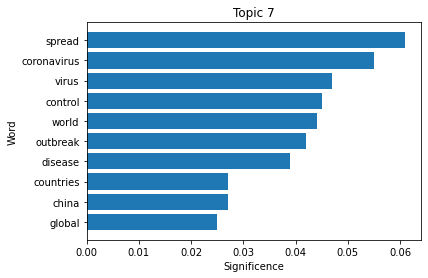

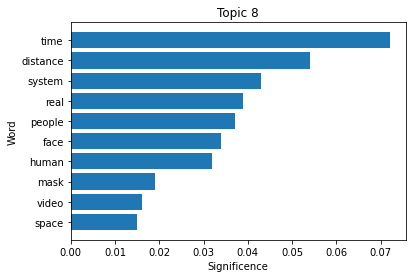

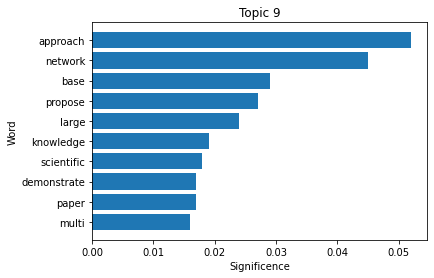

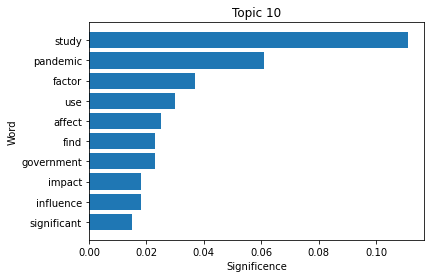

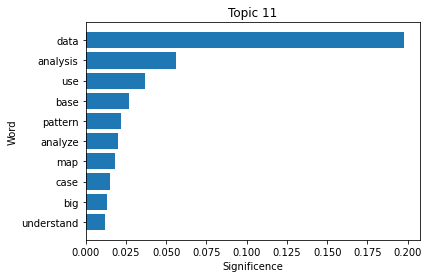

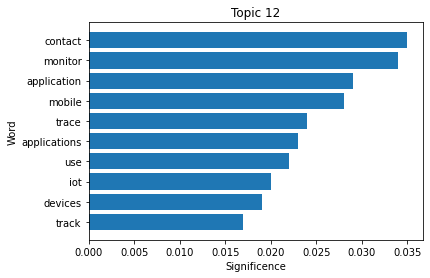

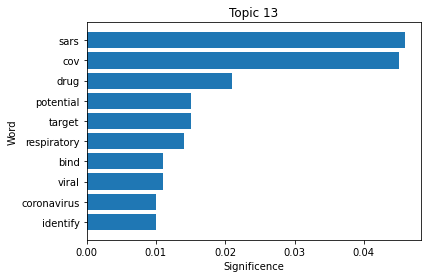

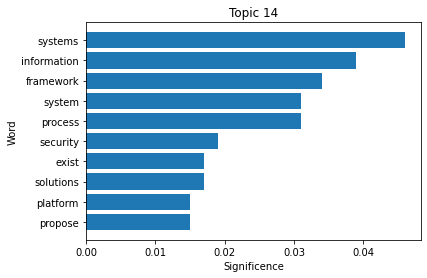

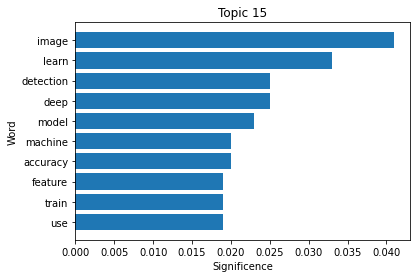

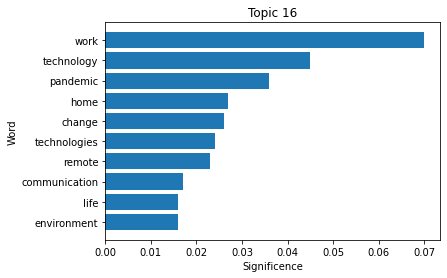

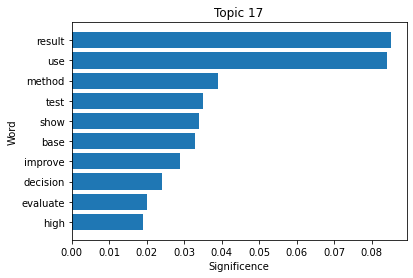

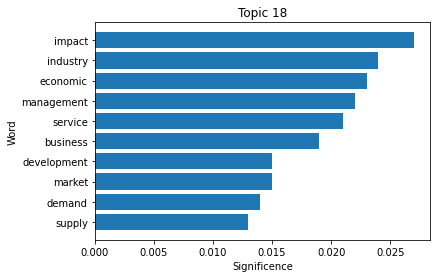

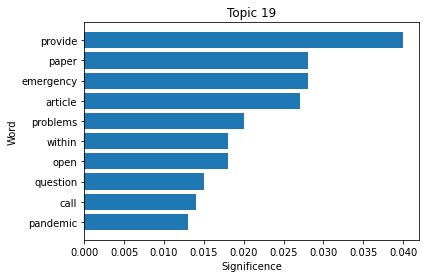

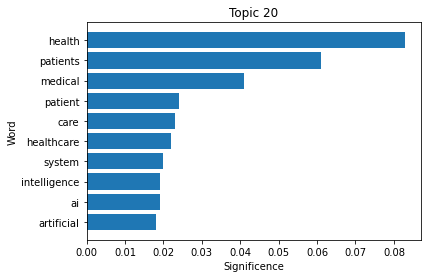

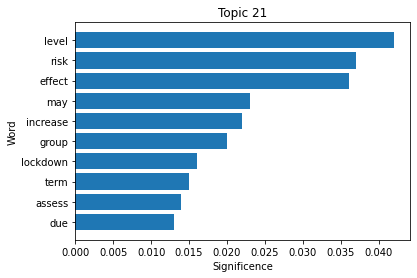

In [31]:
for topic,val in topics.items():
    val = dict(sorted(val.items(),key=lambda x: x[1]))
    draw_bar_graph(val,topic)

In [32]:
chosen_model[bow_corpus[0]]

([(0, 0.018010927),
  (1, 0.03961886),
  (2, 0.027362503),
  (3, 0.059214566),
  (4, 0.04990904),
  (5, 0.02297497),
  (6, 0.021992572),
  (7, 0.07124837),
  (8, 0.025568437),
  (9, 0.039681926),
  (10, 0.044015877),
  (11, 0.02677374),
  (12, 0.018502379),
  (13, 0.018928705),
  (14, 0.01959556),
  (15, 0.29775643),
  (16, 0.022495227),
  (17, 0.07512538),
  (18, 0.025516573),
  (19, 0.021644909),
  (20, 0.035958283),
  (21, 0.01810471)],
 [(0, [15]),
  (1, [10, 1, 7]),
  (2, [7, 1, 5]),
  (3, [15, 9]),
  (4, [17, 15, 9, 11, 1, 12, 8, 14, 2]),
  (5, [15, 3, 1, 11, 8, 17]),
  (6, [15]),
  (7, [20]),
  (8, [4, 11, 15, 10, 1, 14, 20]),
  (9, [18, 15]),
  (10, [15]),
  (11, [15]),
  (12, [15, 17, 9, 21, 4, 5, 13]),
  (13, [15, 1]),
  (14, [6, 9, 16, 0, 19]),
  (15, [7, 15, 13]),
  (16, [15]),
  (17, [15, 12, 8]),
  (18, [1, 17, 12, 3, 20]),
  (19, [15]),
  (20, [15]),
  (21, [1, 11, 8, 14]),
  (22, [7, 15, 4, 20, 13]),
  (23, [1, 21, 16, 8, 20, 17, 19, 3, 18]),
  (24, [15, 7]),
  (25, [18

In [33]:
def get_topic_count():
    topic_count = {}
    for x in range(22):
        topic_count[x]=int(vectorize_co_matrix[x][x])
    return topic_count

In [34]:
topic_count = get_topic_count()
sorted_topic_count = dict(sorted(topic_count.items(),key=lambda x: x[1], reverse=True)) 
sorted_topic_count

{0: 764,
 15: 595,
 4: 563,
 7: 414,
 12: 394,
 18: 394,
 6: 377,
 16: 373,
 13: 352,
 20: 338,
 10: 308,
 17: 306,
 11: 299,
 5: 286,
 14: 280,
 9: 274,
 8: 273,
 3: 240,
 21: 235,
 2: 224,
 1: 215,
 19: 200}

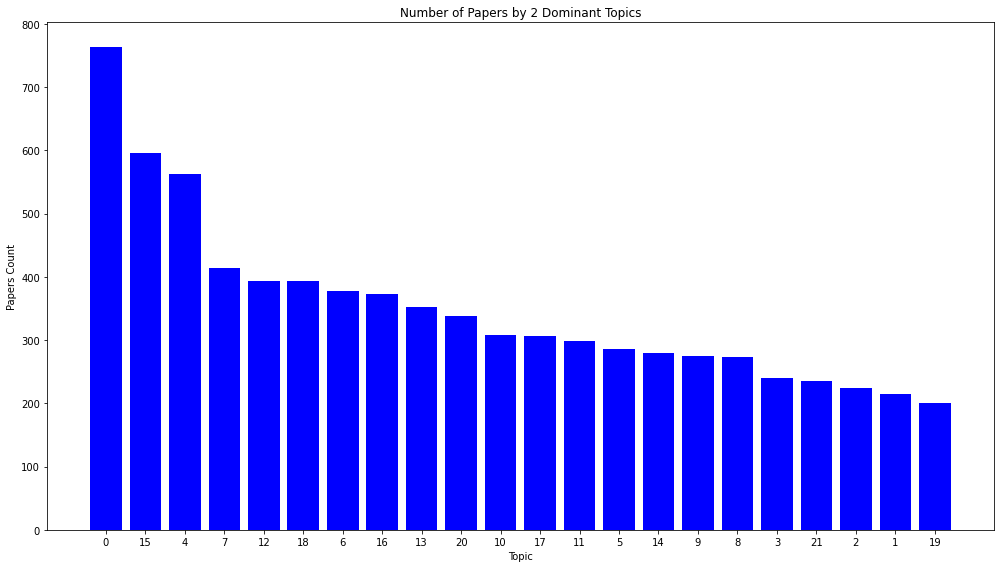

In [35]:
x = list(sorted_topic_count.keys())
count = list(sorted_topic_count.values())

plt.figure(figsize=(14, 8))
x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, count, color='blue')
plt.xlabel("Topic")
plt.ylabel("Papers Count")
plt.title("Number of Papers by 2 Dominant Topics")

plt.xticks(x_pos, x)

plt.tight_layout()

plt.show()

In [36]:
dominant_document = {}
for i in range(22):
    temp = result_df[result_df["1st_topic"] == i]
    temp = temp.sort_values(by=['1st_topic_percentage'], ascending=False)
    dominant_document[i] = {}
    dominant_document[i]["Title"] = temp.iloc[0]["Title"]
    dominant_document[i]["Percentage"] = temp.iloc[0]["1st_topic_percentage"]
dominant_document


{0: {'Title': 'Implementation online lectures in Covid-19 Pandemic: A student perception',
  'Percentage': 49.61},
 1: {'Title': 'A deep learning based approach to child labour detection',
  'Percentage': 24.9},
 2: {'Title': 'Alignment of the marshall grazing incidence X-ray spectrometer (MaGIXS) telescope mirror and spectrometer optics assemblies',
  'Percentage': 25.24},
 3: {'Title': "Action-entropy Approach to Modelling of 'Infodemic Pandemic' System on the COVID-19 Case",
  'Percentage': 22.06},
 4: {'Title': 'Coronavirus Outburst Prediction in India using SEIRD, Logistic Regression and ARIMA Model',
  'Percentage': 48.0},
 5: {'Title': 'Time series based trend analysis for hate speech in twitter during COVID 19 pandemic',
  'Percentage': 35.74},
 6: {'Title': 'Loneliness, boredom and information anxiety on problematic use of social media during the COVID-19 pandemic',
  'Percentage': 36.08},
 7: {'Title': 'Prevention and Control Strategy for Multi-group Epidemics Based on Delay 

In [40]:
json_f = open("dominat_document.json","w")
json.dump(dominant_document,json_f)

In [38]:
result_df.head(10).to_latex()

"\\begin{tabular}{llrrrr}\n\\toprule\n{} &                                              Title &  1st\\_topic &  1st\\_topic\\_percentage &  2nd\\_topic &  2nd\\_topic\\_percentage \\\\\n\\midrule\n0 &  MCNN: A deep learning based rapid diagnosis me... &       15.0 &                 29.78 &       17.0 &                  7.51 \\\\\n1 &  French-language COVID-19 terminology Internati... &        5.0 &                 13.18 &       17.0 &                 12.42 \\\\\n2 &  Exploring working group's psychological subjec... &       16.0 &                 16.42 &       14.0 &                 13.02 \\\\\n3 &  A novel virtual screening procedure identifies... &       13.0 &                 41.29 &        2.0 &                 12.33 \\\\\n4 &  Geospatial mapping, Epidemiological modelling,... &        4.0 &                 25.83 &       11.0 &                 13.60 \\\\\n5 &  The Use of UTAUT Model for Understanding Acade... &       10.0 &                 21.58 &        0.0 &                 14.68

In [60]:
import pandas as pd 
result_df = pd.read_csv("topic_modelling_res.csv")
review = result_df[result_df["1st_topic"] == 21].sort_values(by=['1st_topic_percentage'], ascending=False)[["Title","1st_topic_percentage"]]
pd.options.display.max_colwidth = -1
review

<ipython-input-60-ff88f005e030>:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.options.display.max_colwidth = -1


,Title,1st_topic_percentage
2973,Air quality during SARS-CoV-2 (COVID-19) lockdown in Sarajevo,47.66
2639,"The impact of COVID-19 induced lockdown on the changes of air quality and land surface temperature in Kolkata city, India",38.56
1143,A Short-Term Cryptocurrency Price Movement Prediction Using Centrality Measures,32.86
524,A Network Analysis of the Cryptocurrency Market,29.21
3628,Exploring the potential of traffic index data to analyze essential traffic impact in developing cities,26.73
...,...,...
917,Structure of psychological stress during the COVID-19 pandemic and effects of essential oil odor exposure: Poster abstract,10.17
3201,Predicting COVID-19 Evolution during Mid-March Crisis,9.60
223,A Machine Learning Based Modeling of the Cytokine Storm as it Relates to COVID-19 Using a Virtual Clinical Semantic Network (vCSN),9.51
1888,Mobile Network Performance during the COVID-19 Outbreak from a Testbed Perspective,8.48
